<a href="https://colab.research.google.com/github/KeremKurban/AlgebraicTopology/blob/main/investigation_of_vietors_rips_complexes_on_torus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install -U giotto-tda

In [10]:
import numpy as np
from pathlib import Path
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

def random_points_on_torus(num_points, r1, r2,show=False):
    # Generate random angles for theta and phi
    theta = np.random.uniform(0, 2*np.pi, num_points)
    phi = np.random.uniform(0, 2*np.pi, num_points)

    # Calculate the coordinates of the points on the torus
    x = (r2 + r1*np.cos(phi)) * np.cos(theta)
    y = (r2 + r1*np.cos(phi)) * np.sin(theta)
    z = r1 * np.sin(phi)

    if show:
      # Plot the points in 3D
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.scatter(x, y, z)
      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Z')
      plt.show()
    
    return x,y,z

def make_point_clouds(n_samples_per_shape: int, n_points: int, noise: float):
    """Make point clouds for circles, spheres, and tori with random noise.
    """
    circle_point_clouds = [
        np.asarray(
            [
                [np.sin(t) + noise * (np.random.rand(1)[0] - 0.5), np.cos(t) + noise * (np.random.rand(1)[0] - 0.5), 0]
                for t in range((n_points ** 2))
            ]
        )
        for kk in range(n_samples_per_shape)
    ]
    # label circles with 0
    circle_labels = np.zeros(n_samples_per_shape)

    sphere_point_clouds = [
        np.asarray(
            [
                [
                    np.cos(s) * np.cos(t) + noise * (np.random.rand(1)[0] - 0.5),
                    np.cos(s) * np.sin(t) + noise * (np.random.rand(1)[0] - 0.5),
                    np.sin(s) + noise * (np.random.rand(1)[0] - 0.5),
                ]
                for t in range(n_points)
                for s in range(n_points)
            ]
        )
        for kk in range(n_samples_per_shape)
    ]
    # label spheres with 1
    sphere_labels = np.ones(n_samples_per_shape)

    torus_point_clouds = [
        np.asarray(
            [
                [
                    (2 + np.cos(s)) * np.cos(t) + noise * (np.random.rand(1)[0] - 0.5),
                    (2 + np.cos(s)) * np.sin(t) + noise * (np.random.rand(1)[0] - 0.5),
                    np.sin(s) + noise * (np.random.rand(1)[0] - 0.5),
                ]
                for t in range(n_points)
                for s in range(n_points)
            ]
        )
        for kk in range(n_samples_per_shape)
    ]
    # label tori with 2
    torus_labels = 2 * np.ones(n_samples_per_shape)

    point_clouds = np.concatenate((circle_point_clouds, sphere_point_clouds, torus_point_clouds))
    labels = np.concatenate((circle_labels, sphere_labels, torus_labels))

    return point_clouds, labels

In [2]:
n_samples_per_class = 10
point_clouds, labels = make_point_clouds(n_samples_per_class, 10, 0.1)
point_clouds.shape
print(f"There are {point_clouds.shape[0]} point clouds in {point_clouds.shape[2]} dimensions, "
      f"each with {point_clouds.shape[1]} points.")

There are 30 point clouds in 3 dimensions, each with 100 points.


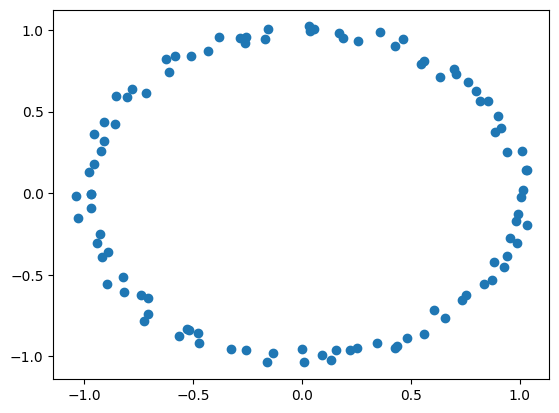

In [3]:
sample_no = 1
plt.scatter(point_clouds[sample_no,:,0],point_clouds[sample_no,:,1])

In [5]:
point_clouds.shape

(30, 100, 3)

In [6]:
x,y,z = point_clouds[0,:,0],point_clouds[0,:,1],point_clouds[0,:,2]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()

In [ ]:
point_clouds[0].shape

(100, 3)

In [12]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Parameter explained in the text
diagrams = VR.fit_transform(point_clouds)
diagrams.shape

(30, 172, 3)

In [14]:
i = 0
plot_diagram(diagrams[i])

In [20]:
x,y,z = random_points_on_torus(100,1,2)
    # Create a 3D scatter plot of the points using plotly
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()


torus = np.vstack([x,y,z]).T
n_torus = np.repeat(torus[np.newaxis,:],4,axis=0)
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Parameter explained in the text
diagrams_torus = VR.fit_transform(n_torus)

i = 0
plot_diagram(diagrams_torus[i])

In [21]:
n_samples_per_class = 1
point_clouds, labels = make_point_clouds(n_samples_per_class, 10, 0)
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Parameter explained in the text
diagrams = VR.fit_transform(point_clouds)

x,y,z = point_clouds[0,:,0],point_clouds[0,:,1],point_clouds[0,:,2]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()


i = 0 
plot_diagram(diagrams[i])